In [1]:
!pip install keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("Airpassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.columns=["month","passengers"]

In [6]:
df.tail()

,month,passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
df=df.drop(["month"],axis=1)

In [8]:
df.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


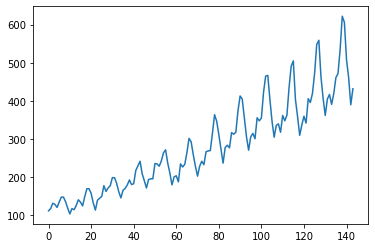

In [10]:
plt.plot(df);

In [11]:
scaler=MinMaxScaler()
df=scaler.fit_transform(df)

In [12]:
len(df)

144

In [13]:
type(df)

numpy.ndarray

In [14]:
df[0:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [15]:
train=df[0:100,:]
test=df[100:,:]

In [16]:
def get_df(df,steps):
    data_X=[]
    data_Y=[]
    for i in range (len(df)-steps-1):
        a=df[i:(i+steps),0]
        data_X.append(a)
        data_Y.append(df[i+steps,0])
    return np.array(data_X),np.array(data_Y)

# steps=2

In [17]:
steps=2

In [18]:
X_train,y_train=get_df(train,steps)
X_test,y_test=get_df(test,steps)

In [19]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [20]:
!pip install tensorflow
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = tf.keras.Sequential()
model.add(LSTM(128, input_shape = (1, steps))) 
model.add(Dense(64))                                  
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67072     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 2/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 3/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 4/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 5/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 6/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 7/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 8/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 9/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 10/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 11/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 12/25
97/97 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 13/25
97/97 [==============================

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

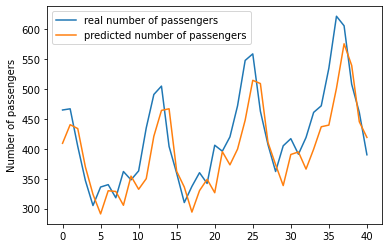

In [26]:
# plot real number of passengers and predictions...
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()